<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 4<br/>Reconnaissance des entités nommées

**Objectif**

L'objectif de ce travail est de comparer la reconnaissance des entités nommées (*named entity recognition*, NER) faite par quatre systèmes : NLTK, spaCy (deux modèles, 'en_core_web_sm' et 'en_core_web_lg'), et DistilBERT/NER.  Les données de test en anglais vous sont fournies sur Cyberlearn au format CoNLL.  Pour comparer les systèmes, on utilise la macro-moyenne des scores f1 pour chaque étiquette.  Vous pouvez concevoir l'ensemble du projet par vous-mêmes, ou suivre les indications suivantes.

## 1. NER avec spaCy et NLTK sur un texte court

In [1]:
import spacy
from spacy.tokens import Doc

In [2]:
#!python -m spacy download en_core_web_sm
# exécuter la ligne ci-dessus une fois, si nécessaire, idem pour en_core_web_lg

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
raw_text = "Reinhold Messner made a solo ascent of Mount Everest and was later a member of the European Parliament." 

**1a.** Veuillez traiter ce texte avec la pipeline 'nlp', et pour chaque entité nommée trouvée veuillez afficher les mots qui la composent et son type.

In [5]:
doc = nlp(raw_text)

print("Tokens and their POS tags:")
for token in doc:
    print(f"{token.text}: {token.pos_}")

Tokens and their POS tags:
Reinhold: PROPN
Messner: PROPN
made: VERB
a: DET
solo: ADJ
ascent: NOUN
of: ADP
Mount: PROPN
Everest: PROPN
and: CCONJ
was: AUX
later: ADV
a: DET
member: NOUN
of: ADP
the: DET
European: PROPN
Parliament: PROPN
.: PUNCT


In [6]:
import nltk
#nltk.download('maxent_ne_chunker') 
#nltk.download('words') 
# exécuter les deux lignes ci-dessus une fois, si nécessaire

**1b.** Veuillez effectuer avec NLTK la tokenization, le POS tagging et le *NE chunking* de `raw_text` (voir la [documentation NLTK](https://www.nltk.org/api/nltk.chunk.ne_chunk.html#nltk.chunk.ne_chunk)).  Veuillez afficher le résultat et indiquer son type.

In [7]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

def extract_entities(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = pos_tag(tokens)
    
    # Perform Named Entity Recognition
    named_entities = ne_chunk(pos_tags)

    entities = []
    for subtree in named_entities:
        if isinstance(subtree, Tree):
            entity_name = " ".join([word for word, tag in subtree.leaves()])
            entity_type = subtree.label()
            entities.append((entity_name, entity_type))
    
    return entities, named_entities

In [8]:
entities, named_entities = extract_entities(raw_text)

print("\nNamed Entities:")
for entity in entities:
    print(f"{entity[0]}: {entity[1]}")



Named Entities:
Reinhold: PERSON
Messner: PERSON
Mount Everest: PERSON
European Parliament: ORGANIZATION


**1c.** Veuillez afficher, pour chaque entité nommée, les mots qui la composent et son type.  Vous pouvez parcourir le résultat précédent avec une boucle `for`, et déterminer si un noeud possède une étiquette avec la fonction `hasattr(noeud, 'label')`.

In [9]:
def print_tree(tree, indent="  "):
    if isinstance(tree, Tree):
        print(indent + str(tree.label()))
        for child in tree:
            print_tree(child, indent + "  ")
    else:
        print(indent + str(tree))


In [10]:
print_tree(named_entities)

  S
    PERSON
      ('Reinhold', 'NNP')
    PERSON
      ('Messner', 'NNP')
    ('made', 'VBD')
    ('a', 'DT')
    ('solo', 'JJ')
    ('ascent', 'NN')
    ('of', 'IN')
    PERSON
      ('Mount', 'NNP')
      ('Everest', 'NNP')
    ('and', 'CC')
    ('was', 'VBD')
    ('later', 'RB')
    ('a', 'DT')
    ('member', 'NN')
    ('of', 'IN')
    ('the', 'DT')
    ORGANIZATION
      ('European', 'NNP')
      ('Parliament', 'NNP')
    ('.', '.')


**1d.** À ce stade, que pensez-vous de la qualité des résultats de chaque système ?

*Réponse :*

*Nltk est plus précis que spacy. Il donne aussi plus d'informations sur les entités nommées. Par exemple, il donne le type de l'entité nommée (personne, organisation, etc.) et lie les entités qui le sont. Par exemple ici, "Mount Everest" est une seul entité nommée, alors que spacy le découpe en deux entités nommées. Il y a aussi quelques différences sur les type des mots comme avec "was" qui est un "AUX" pour Spacy et un "VBD" pour Nltk.*

## 2. Prise en main des données de test

**2a.** Quel est le format du fichier `eng.test.a.conll` ?  Quelle information contient chaque colonne ?  Quel est le format des tags NE ?

Note : ce fichier fait partie des données de test pour la NER sur l'anglais de la conférence [CoNLL](https://www.clips.uantwerpen.be/pages/past-workshops) 2003. On peut lire [ici](https://www.clips.uantwerpen.be/conll2003/ner/) la description de la tâche et les scores obtenus.  On peut trouver une copie des données [ici](https://sourceforge.net/p/text-analysis/svn/1243/tree/text-analysis/trunk/Corpora/CoNLL/2003/) ou [ici](https://github.com/synalp/NER/tree/master/corpus/CoNLL-2003).  Les textes proviennent du [corpus Reuters](http://trec.nist.gov/data/reuters/reuters.html).

The first item on each line is a word, the second a part-of-speech (POS) tag, the third a syntactic chunk tag and the fourth the named entity tag.

*Réponse :*

*Le format du fichier est un fichier texte avec une ligne par mot. Chaque ligne contient 4 colonnes séparées par des espaces. La première colonne contient le mot, la deuxième le tag de la partie du discours (POS), la troisième le tag de la syntaxe et la quatrième le tag de l'entité nommée (NE).*

*Le format des tags NE est I-TYPE, ce qui signifie que le mot se trouve à l'intérieur d'une phrase de type TYPE. Ce n'est que si deux phrases du même type se suivent immédiatement que le premier mot de la deuxième phrase aura l'étiquette B-TYPE pour montrer qu'il commence une nouvelle phrase. Un mot portant l'étiquette O ne fait pas partie d'une phrase. TYPE peut être PER (personne), LOC (lieu), ORG (organisation) ou MISC (divers).*

**2b.** Veuillez charger les données de `eng.test.a.conll` grâce à la classe `ConllCorpusReader` de NLTK vue dans les labos précédents (voir [documentation](https://www.nltk.org/api/nltk.corpus.reader.conll.html#nltk.corpus.reader.conll.ConllCorpusReader)). Veuillez lire les colonnes qui contiennent les tokens ('words'), les POS tags ('pos') et les informations sur les entités nommées ('chunk') et afficher les quatre premières phrases, accessibles via la méthode `.iob_sents()`.

In [11]:
from nltk.corpus.reader.conll import ConllCorpusReader

In [12]:
conll_corpus = ConllCorpusReader('.', 'eng.test.a.conll', ['words', 'pos', 'ignore', 'chunk'])

In [13]:
print("\nConll Corpus:")
for sentence in conll_corpus.iob_sents()[1:5]:
    print(sentence)


Conll Corpus:
[('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'I-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
[('LONDON', 'NNP', 'I-LOC'), ('1996-08-30', 'CD', 'O')]
[('West', 'NNP', 'I-MISC'), ('Indian', 'NNP', 'I-MISC'), ('all-rounder', 'NN', 'O'), ('Phil', 'NNP', 'I-PER'), ('Simmons', 'NNP', 'I-PER'), ('took', 'VBD', 'O'), ('four', 'CD', 'O'), ('for', 'IN', 'O'), ('38', 'CD', 'O'), ('on', 'IN', 'O'), ('Friday', 'NNP', 'O'), ('as', 'IN', 'O'), ('Leicestershire', 'NNP', 'I-ORG'), ('beat', 'VBD', 'O'), ('Somerset', 'NNP', 'I-ORG'), ('by', 'IN', 'O'), ('an', 'DT', 'O'), ('innings', 'NN', 'O'), ('and', 'CC', 'O'), ('39', 'CD', 'O'), ('runs', 'NNS', 'O'), ('in', 'IN', 'O'), ('two', 'CD', 'O'), ('days', 'NNS', 'O'), ('to', 'TO', 'O'), ('take', 'VB', 'O'), ('over', 'IN', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'O'), ('head', 'NN', 'O'), 

**2c.** Veuillez préparer les données pour le test, en ne gardant que les phrases ayant au moins trois (3) tokens (pas 0, 1, 2) :

* une variable `test_tokens` contiendra les tokens groupés par phrase (liste de listes de strings)
* une variable `test_tags` contiendra tous les tags NE en une seule liste (en vue de l'évaluation)

In [14]:
test_tags = []
test_tokens = []

for sentence in conll_corpus.iob_sents():
    tokens_length = len(sentence)
    if tokens_length >= 3: # Ignore sentences with less than 3 tokens
        test_tokens.append([token for token, _, _ in sentence]) # Extract tokens
        for _, _, tag in sentence: # Extract tags
            test_tags.append(tag)

In [15]:
print("\nExemple Test Tokens:")
for tokens in test_tokens[:5]:
    print(tokens)

print("\nExemple Test Tags:")
for tags in test_tags[:12]:
    print(tags)


Exemple Test Tokens:
['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.']
['West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.']
['Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.']
['After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'England', '

**2d.** Combien d'occurrences de tags contient `test_tags`?  Combien de tags différents y a-t-il, et lesquels sont-ils ?  Combien il y a d'occurrences de tags de chaque type ?  Combien de phrases y a-t-il dans `test_tokens` ?

In [16]:
print("Nombre d'occurences de test_tags: " + str(len(test_tags)))
print("Nombre de tags uniques: " + str(len(set(test_tags))))
print(set(test_tags))
print("Nombre d'occurences de chaque tag: " + str({tag: test_tags.count(tag) for tag in set(test_tags)}))

print("Nombre de phrases dans le corpus de test: " + str(len(test_tokens)))

Nombre d'occurences de test_tags: 50817
Nombre de tags uniques: 5
{'I-ORG', 'I-MISC', 'O', 'I-PER', 'I-LOC'}
Nombre d'occurences de chaque tag: {'I-ORG': 2080, 'I-MISC': 1228, 'O': 42474, 'I-PER': 3097, 'I-LOC': 1938}
Nombre de phrases dans le corpus de test: 2970


## 3. Performances de NLTK pour la NER

**3a.** Le NER de NLTK a un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertit chaque tag du NER de NLTK vers le tag correspondant pour les données de test. 

In [36]:
def convert_nltk_conll(nltk_tag):
  corresp = {
    'O': 'O',
    'ORGANIZATION': 'I-ORG',
    'PERSON': 'I-PER',
    'LOCATION': 'I-LOC',
    'GPE': 'I-LOC',
    'FACILITY': 'I-LOC',
    'MISC': 'I-MISC'
  }
  return corresp.get(nltk_tag, 'I-MISC')
                


**3b.** Veuillez exécuter la NER de NLTK sur chacune des phrases de `test_tokens`, ce qui assure que NLTK aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `nltk_tags`.

In [29]:
nltk_tags = []

for sentence in test_tokens:
    chunks = nltk.ne_chunk(nltk.pos_tag(sentence))
    for subtree in chunks:
        if hasattr(subtree, 'label'):
            nltk_tags += [subtree.label() for leaf in subtree.leaves()]
        else:
            nltk_tags.append('O')


**3c.** Veuillez convertir les tags de `nltk_tags` grâce à la fonction précédente, dans une liste appelée `nltk_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

In [39]:
nltk_tags_conv = [convert_nltk_conll(tag) for tag in nltk_tags]

print('TEST\tNLTK\tCONNLU')
for i in range(10):
    print(test_tags[i],'\t',nltk_tags[i],'\t',nltk_tags_conv[i])


TEST	NLTK	CONNLU
O 	 GPE 	 I-LOC
O 	 O 	 O
I-ORG 	 ORGANIZATION 	 I-ORG
O 	 O 	 O
O 	 O 	 O
O 	 O 	 O
O 	 ORGANIZATION 	 I-ORG
O 	 O 	 O
O 	 ORGANIZATION 	 I-ORG
O 	 O 	 O


**3d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

Classification Report :

              precision    recall  f1-score   support

       I-LOC       0.55      0.72      0.62      1938
      I-MISC       0.16      0.01      0.01      1228
       I-ORG       0.51      0.35      0.41      2080
       I-PER       0.77      0.74      0.76      3097
           O       0.96      0.99      0.97     42474

    accuracy                           0.91     50817
   macro avg       0.59      0.56      0.56     50817
weighted avg       0.89      0.91      0.90     50817



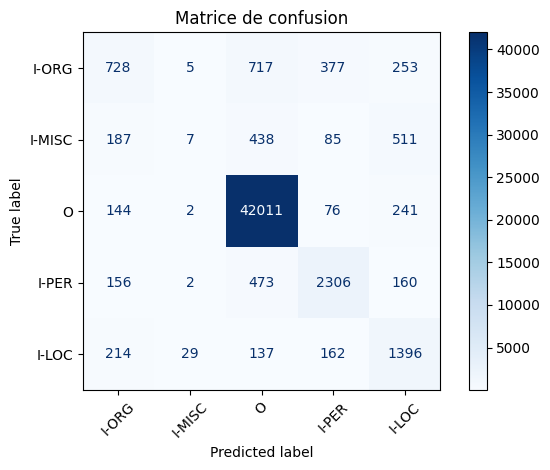

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

report = classification_report(test_tags, nltk_tags_conv)
print("Classification Report :\n")
print(report)

cm = confusion_matrix(test_tags, nltk_tags_conv, labels=list(set(test_tags + nltk_tags_conv)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(test_tags + nltk_tags_conv)))
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()

## 4. Performances de spaCy pour la NER

**4a.** Le NER de spaCy a aussi un jeu de tags différents de celui des données de test.  Veuillez chercher les informations pour compléter la fonction suivante qui convertir chaque tag du NER de spaCy dans le tag correspondant pour les données de test.  Attention à la logique des conversions. 

In [ ]:
# def convert_spacy_conll(spacy_tag):

# todo continuer ici


**4b.** Veuillez exécuter la NER de spaCy sur chacune des phrases de `test_tokens`, ce qui assure que spaCy aura la même tokenisation que les données de référence.  Veuillez stocker les tags dans une liste unique appelée `spacy_tags`.

**4c.** Veuillez convertir les tags de `spacy_tags` grâce à la fonction précédente, dans une liste appelée `spacy_tags_conv`.  Veuillez afficher le nombre total de tags et les dix premiers.  Vous pouvez plusieurs essais en changeant la fonction, pour aboutir à la conversion qui maximise le score.

**4d.** Veuillez afficher le rapport d'évaluation de classification obtenu de Scikit-learn et la matrice de confusion pour tous les types de tags apparaissant dans les données de test.

**4e.** Veuillez exécuter également le modèle 'en_core_web_lg' de spacy et afficher le rapport d'évaluation (il n'est pas demander d'afficher la matrice de confusion).  Vous pouvez recopier ici le minimum de code nécessaire à l'obtention des résultats, avec une nouvelle pipeline spaCy appelée 'nlp2'.

In [ ]:
# !python -m spacy download en_core_web_lg


## 5. Utilisation d'embeddings contextualisés fournis par BERT

Dans cette section, vous allez évaluer un modèle basé sur le Transformer, qui fournit des embeddings contextualisés pour chaque token.  Ces embeddings sont ensuite utilisés par une couche finale (appelée _NER head_) pour assigner à chaque token une étiquette indiquant les entités nommées.  Le modèle et les instructions pour l'utiliser sont disponibles ici : https://huggingface.co/dslim/distilbert-NER (il s'agit d'une version de BERT "distillée" dans un modèle plus léger, suivi du _NER head_).

**5a.** Prise en main du modèle : à l'aide des exemples fournis sur Hugging Face, veuillez appliquer DistilBERT_NER sur les 3 premières phrases des données contenues dans `test_tokens` (voir le point 2c) et afficher les résultats obtenus.  Quelles sont les différences avec les résultats de NLTK et de spaCy ?

In [ ]:
# Importer les trois classes, créer le tokenizer, le modèle et la pipeline.


In [ ]:
# Tester la pipeline sur les 3 premières phrases de test_tokens : afficher la phrase et le résultat de la pipeline.
# Concaténer les tokens avec ' '.join(liste_de_tokens) avant de les donner à la pipeline. 


**5b.** Le modèle DistilBERT utilise son propre tokeniseur, c'est pourquoi les étiquettes indiquant les entités nommées sont parfois portées par plusieurs *subwords* composant un mot.  Il faut donc parfois agréger une liste d'étiquettes en une seule.  

Veuillez écrire une fonction qui prend en entrée une liste d'étiquettes et retourne une seule étiquette : soit la première, soit celle qui est majoritaire.  Cette fonction sera utilisée plus loin.

In [ ]:
from collections import Counter
def tag_fusion(tag_list, method='first'): # ou method='majority'

print(tag_fusion(['O', 'B-PER', 'B-PER'], method='majority'))

IndentationError: expected an indented block after function definition on line 2 (3300681988.py, line 4)

**5c.** Veuillez afficher le `set` des tags apparaissant dans les résultats de DistilBERT_NER sur les 50 premières phrases du corpus.  Comment se comparent-ils aux tags des données de test CoNLL ?

**5d.**  Sur le modèle des points 3a et 4a, veuillez écrire une fonction qui convertit les tags générés par DistilBERT_NER aux tags des donnéees de test.  Vous utiliserez cette fonction plus loin.  

In [ ]:
def convert_bert_conll(bert_tag):


**5e.** La pipeline DistilBERT_NER utilise son propre tokeniseur, qui ne peut pas être changé, car le modèle DistilBERT a été défini et entraîné avec lui.  On doit donc convertir les tokens du modèle à la même tokenisation que celle des données de test, en vue de l'évaluation.  Pour cela, on vous donne la fonction `convert_tokens` ainsi que du code pour la tester.  Veuillez étudier le code pour pouvoir l'utiliser plus bas, puis répondez aux questions ci-après.

In [ ]:
def convert_tokens(ref_tokens, bert_result, word_ids):
    tokenized = tokenizer.tokenize(' '.join(ref_tokens))
    all_tags = []
    for tok, i in zip(tokenized, range(len(tokenized))):
        label = [tag['entity'] for tag in bert_result if tag['index'] == i+1]
        if label:
            label = label[0]
        else:
            label = 'O'
        if tok[:2] == '##' or word_ids[i] == word_ids[i-1]: 
            all_tags[-1].append(label)
        else:
            all_tags.append([label])
    return [tag_fusion(taglist, method='first') for taglist in all_tags]

In [ ]:
# Test de la fonction convert_tokens:
i = 1 # choix de la phrase
def print_len(l):
    print(len(l), '--', l)
print_len(test_tokens[i]) # Affichage 1
tokenized_by_bert = tokenizer(test_tokens[i], add_special_tokens=False, is_split_into_words=True)
print_len(tokenizer.convert_ids_to_tokens(tokenized_by_bert["input_ids"]))  # Affichage 2
print_len(tokenized_by_bert.word_ids())  # Affichage 3
tagged_by_bert = distilbert_ner(' '.join(test_tokens[i]))
print_len(tagged_by_bert)  # Affichage 4
print_len(convert_tokens(test_tokens[i], tagged_by_bert, tokenized_by_bert.word_ids()))  # Affichage 5

In [ ]:
# Questions
# 1. Que représentent les trois paramètres de convert_tokens ? Définissez-les comme dans une docstring.
# 2. Que représentent les cinq lignes affichées par le code de test ?
# 3. Quels sont les deux problèmes traités par la fonction convert_tokens ?


**5f.** Veuillez effectuer la reconnaissance des entités nommées avec la pipeline DistilBERT_NER et obtenir la liste finale de tags avec les noms convertis à ceux du jeu de référence grâce à `convert_bert_conll`.

In [ ]:
j = 20 # se limiter aux j premières phrases sur les 2970 (utile pendant le développement, mais les utiliser toutes à la fin)
bert_tags_conv = []

print(len(bert_tags_conv))

**5g.** En comparant `test_tags` avec `bert_tags_conv`, veuillez afficher le rapport d'évaluation de la classification et la matrice de confusion, pour tous les types de tags apparaissant dans les données de test.

**5h.** Laquelle des deux stratégies de `tag_fusion` (premier tag ou tag majoritaire) conduit à de meilleurs résultats ?  Veuillez effectuer l'expérience et indiquer simplement les scores obtenus et votre conclusion dans le champ suivant.  Pour la conclusion finale, gardez 'first'.

## 6. Discussion finale

Veuillez comparer les scores des quatre modèles testés, en termes de **macro avg**.  Pourquoi ce score est-il le plus informatif ?  Veuillez indiquer également la taille des modèles spaCy évalués.

**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.